# Language Processing II

## Lecture 3 -  Recurrent Neural Network Language Models

Jurgen Wedekind and Manex Agirrezabal

### My goal for today:

  - What is a Neural Language Model?
  - How can we overcome the limitations of a Markov LM or a NLM?

#### Neural Language Models

Imagine you have the following:

  - A corpus
  - Your computer
  - Python & Scikit-learn
  
And remember what we saw in the previous two weeks.

### <center>I follow _</center>

$$ P (w_t = rivers | C = I\ follow)$$

How would you make a language model?

*A Neural Probabilistic Language Model* - Bengio et al. (2003)



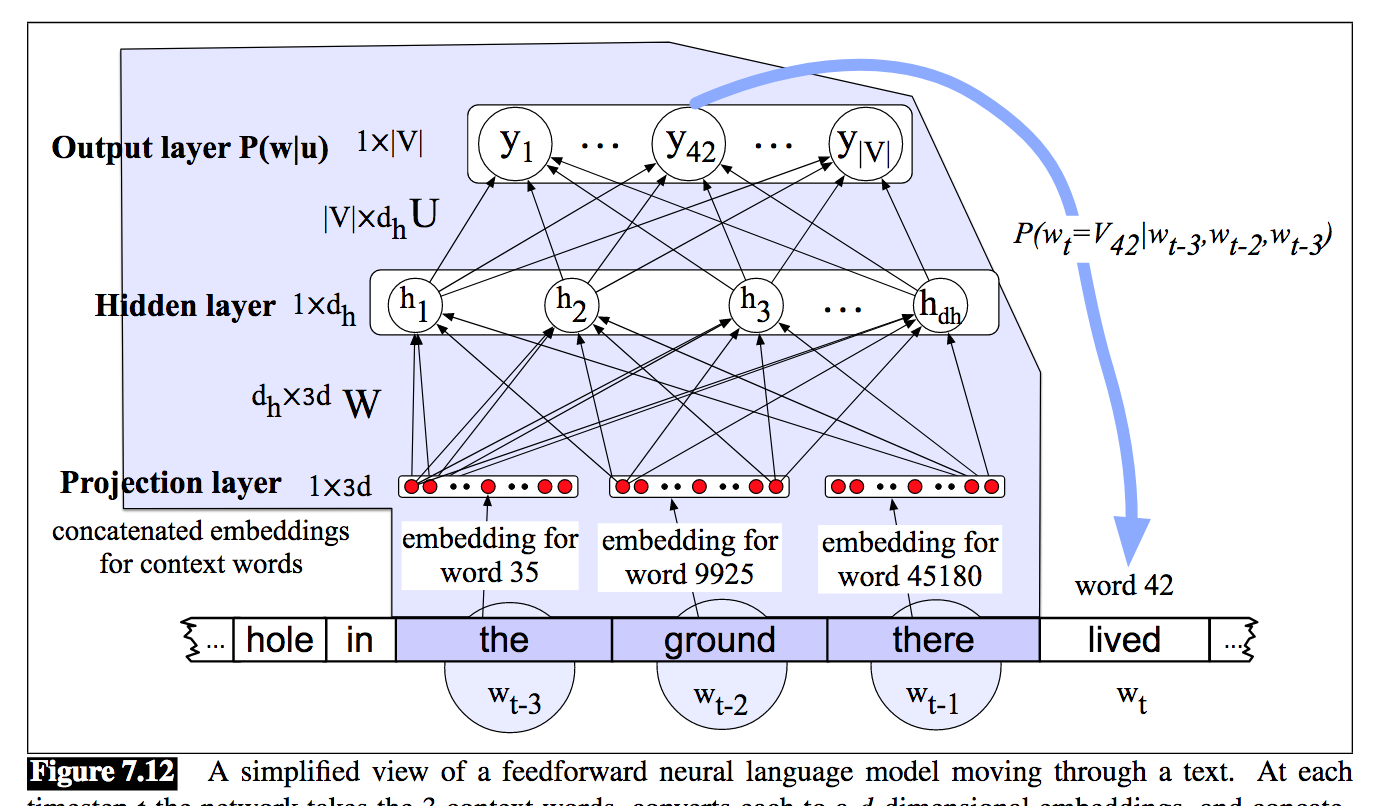

<img src="images/mlpnlm.png"/>

## Steps:

  - Logistic Regression

$$pr\_y = \sum_{i=0}^{N}{w_ix_i}$$

$$y = \sigma{}(pr\_y)$$

  - Multiclass Logistic Regression (Remember the ML assignment in Scientific Programming)

Classes = $A,B,C$

$$y = \sigma{}(\sum_{i=0}^{N}{w_ix_i})$$

Then,

$$y_A = \sigma{}(\sum_{i=0}^{N}{w_{A,i}x_i})$$

$$y_B = \sigma{}(\sum_{i=0}^{N}{w_{B,i}x_i})$$

$$y_C = \sigma{}(\sum_{i=0}^{N}{w_{C,i}x_i})$$


<center>How would you interpret $y_A$, $y_B$ and $y_C$?</center>

the probability of belonging to each of these classes

<center>Is that what we need?</center>

 logistic regression does not give you a probability distribution, but language models require a prob distribution
 
 - Softmax to get a probability distribution of possible next words

What we need here is a softmax function:

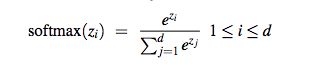

<img src="images/softmax.png"/>

<center>Why don't you implement it?</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.e

2.718281828459045

In [ ]:
np.exp # takes something to the power of e

In [5]:
def softmax(x):
    #YOUR CODE HERE
    out = []
    for ele in x:
        out.append(np.exp(ele)/(sum([np.exp(j) for j in x])))
    return out

In [6]:
Y = [0.8, 0.7, 0.4]
np.sum(Y)

1.9

In [7]:
softmax(Y)

[0.3883257680168782, 0.3513716852892231, 0.26030254669389874]

In [4]:
softmax(Y)

array([0.38832577, 0.35137169, 0.26030255])

In [5]:
Y,softmax(Y)

([0.8, 0.7, 0.4], array([0.38832577, 0.35137169, 0.26030255]))

<center>Then, how do you implement a Language Model using Scikit-learn?</center>

Instead of three classes, words in the vocabulary.

And the input, could be two One-hot representations of the $n-1$ and $n-2$ words.

That's a MaxEnt Language Model!

But, is a Maxent model (Multinomial LR) good enough?

  - Deeper model to better capture underlying representations
  - Nonlinearities between layers

Let's put one hidden layer with 2 units.

Classes = $A,B,C$

$$h_1 = G(\sum_{i=0}^{N}{w_{xh1,i}x_i})$$

$$h_2 = G(\sum_{i=0}^{N}{w_{xh2,i}x_i})$$

where $G$ is a non-linearity ($relu$, $tanh$, $\ldots$).

As we have three classes, we need to output again three numbers:

Classes = $A,B,C$

$$y_A = \sum_{i=1}^{2}{w_{h_iA}h_i}$$

$$y_B = \sum_{i=1}^{2}{w_{h_iB}h_i}$$

$$y_C = \sum_{i=1}^{2}{w_{h_iC}h_i}$$

In the last layer there is no activation function because the activation is Softmax.

<center>After that, softmax!</center>

And that's a Multilayer Perceptron!

## Steps:

  - Logistic Regression
  - Multiclass Logistic Regression (Remember the ML assignment in Scientific Programming)
  - Softmax to get a probability distribution of possible next words
  - Deeper model to better capture underlying representations - add more layers
  - Nonlinearities between layers

Then, now, the real question:

<center>Given a text, how do you implement a Neural Language Model?</center>

We need $X$ and $y$ to train a model.

```
fit(X, y)[source]
Fit the model to data matrix X and target(s) y.

Parameters:	
...
```

#### EXERCISE WITH NEURAL LM with SCIKIT-LEARN

Then, we agree that training a Neural Language Model is relatively easy.

<center>But, which are the limitations of this model?</center>

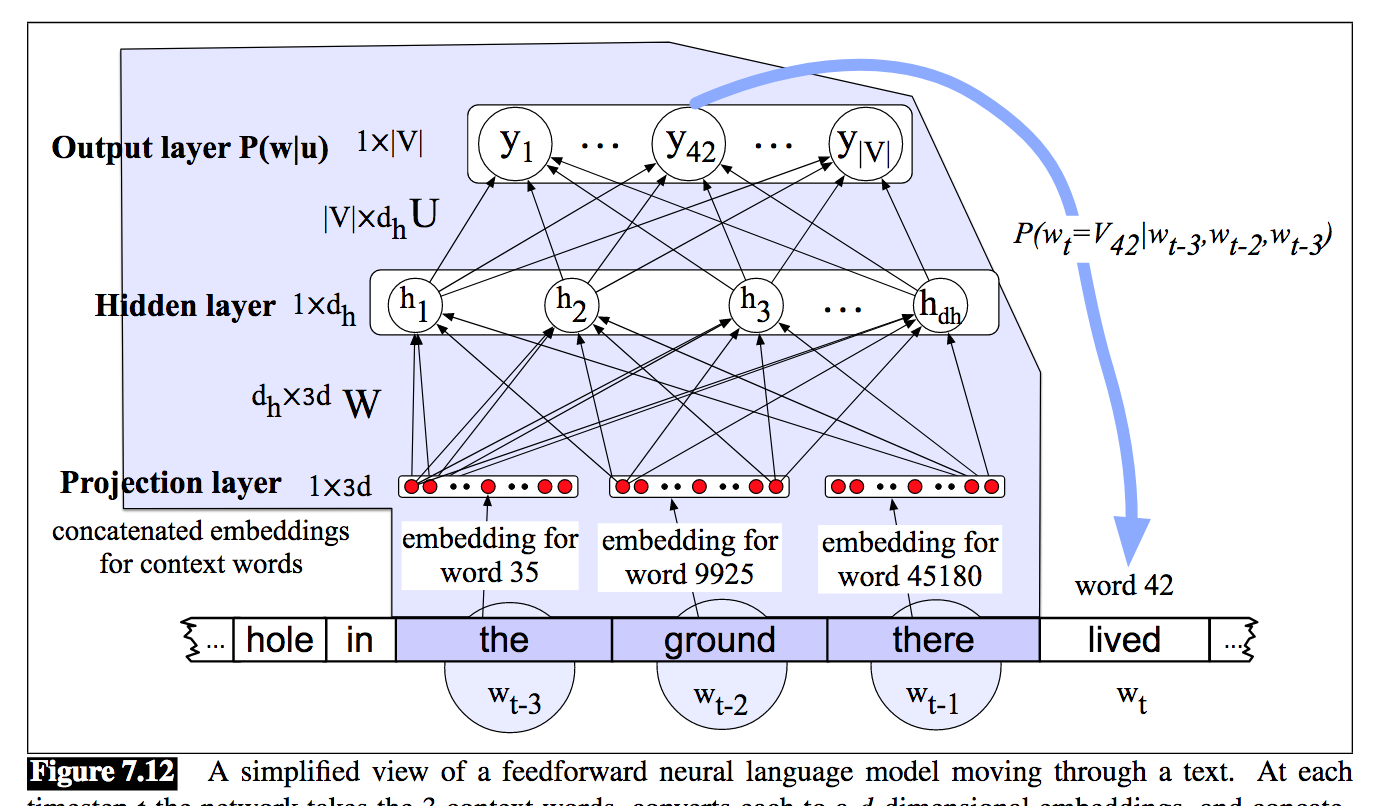

<img src="images/mlpnlm.png"/>

We are still using what we call a **sliding window**. This approach is reminiscent of the Markov approach.

How can we overcome that?

### Recurrent Neural Networks

Something like this, maybe?

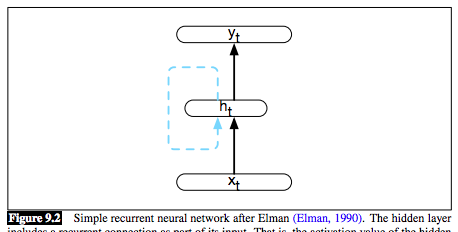

<img src="images/rnn.png"/>

The key difference between the previous models and this one, is the light blue dotted line.

This link augments the input to the hidden layer with the activation value of the
hidden layer from the preceding point in time.

The same network, but illustrated in a slightly different way.

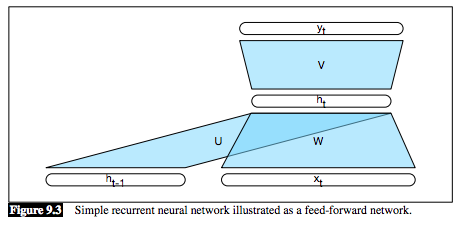

<img src="images/rnnffn.png"/>

The hidden layer from the previous timestep $h_{t-1}$ provides a form of memory.

Importantly, the architecture does not impose a fixed-length limit on this prior context;

The context embodied in the previous hidden layer includes information extending back to the beginning of the sequence.

But how would this be encoded as a mathematical formula?

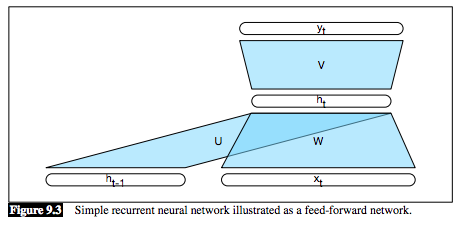

<img src="images/rnnffn.png"/>

$$h_t = G(Uh_{t−1} + Wx_t)$$

$$y_t = F(V h_t)$$

Then, if we have a sequence of three elements:

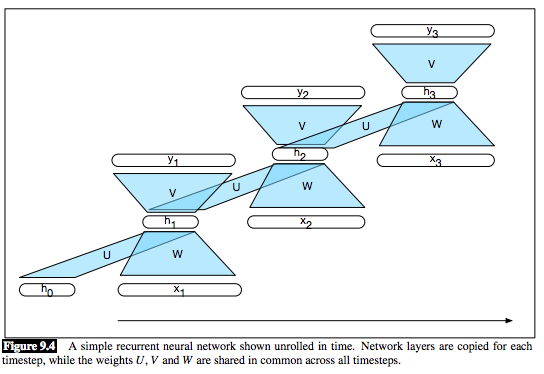

<img src="images/rnnunrolled.png"/>

```
function FORWARDRNN(x, network) returns output sequence y
    h0 ←0
    for i←1 to LENGTH(x) do
        hi←g(U hi−1 + W xi)
        yi← f(V hi)
    return y
```

```
function BACKPROP_THROUGH_TIME (sequence, network) returns gradients for weight updates
    forward pass to gather the loss
    backward pass compute error terms and assess blame
```

### Why all this?

You need this to understand the following works:
  
  - Alex Graves, (2014) *Generating Sequences With Recurrent Neural Networks*
  - I Sutskever, O Vinyals, QV Le, (2014) *Sequence to sequence learning with neural networks*
  - D Bahdanau, K Cho, Y Bengio, (2014) *Neural machine translation by jointly learning to align and translate*


### Exercises from min-rnn

  1. Which are the sizes of the equivalent matrices $U$, $W$ and $V$?
  2. How is each character represented? What is the input ($x_t$) to the network?
  3. What is the output of the model? How is this generated?
  4. There are two different places in which the output is generated. Which are the specific lines?